In [ ]:
#As we dont have any GPU we will be using google collab for GPU usage
#Mount at drive
import sys
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

import matplotlib.patches as mpatches

# plotly
from chart_studio import plotly as py
#import plotly.plotly as py
import plotly
import plotly.offline as pyo

from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode()
import plotly.graph_objs as go
import plotly.figure_factory as ff # import figure factory

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
path = "/content/drive/MyDrive/Project_7th_Sem"

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/Collected_labelled_data.csv")

In [ ]:
dff.head(5)

Unnamed: 0     Video Id                                              Title  \
0           0  vToAQcbADzQ       Meet Ritesh Agarwal OYO Founder | Episode 62   
1           1  VYoxW9Rl3WI  Meet Love Birds Amrita Rao &amp; RJ Anmol | Ep...   
2           2  i0ZHTiDTS30             Meet Dr. Vikas Divyakirti | Episode 50   
3           3  54fDoB0Qnao                 Mind Reading By Sandeep Maheshwari   
4           4  ezmWdMXp6ys  Meet Aleena Rais | Speak English With Confiden...   

                                         Description     Category  Label  
0  To be a guest in the Sandeep Maheshwari Show, ...  motivaion_1      0  
1  YouTube Channel: https://youtube.com/@AmritaRa...  motivaion_1      0  
2  YouTube Channel: https://www.youtube.com/c/Dri...  motivaion_1      0  
3  Sandeep Maheshwari is a name among millions wh...  motivaion_1      0  
4  YouTube Channel: https://www.youtube.com/c/Ale...  motivaion_1      0

In [ ]:
#df = dff
df =  shuffle(dff).reset_index(drop=True)
#df.drop(["User"],axis=1, inplace=True)
df.drop(["Unnamed: 0", "Video Id", "Title","Category"], axis=1, inplace=True)
df = df.rename(columns={"Description": "text"})

df = df.rename(columns={"Label": "class"})
df = df.dropna()
df.head(10)

text  class
0   In This Video, Dr. Vivek Bindra talks about le...      1
1   IMPORTANT: If you have anything against my upl...      0
2   It's a new year and new beginning for many ind...      0
3   Cyril Hanouna insulte le député LFI Louis Boya...      0
5   Audio book available for free here - http://am...      0
6   Matthew McConaughey shares his profound words ...      0
7   जिस दिन कोचिंग खत्म बस ये करना..  ||Avadh Ojha...      0
8   Allah Se Talluq __ Spiritual Motivational spee...      0
11  Enjoy this simple and fun object lesson that t...      0
12  I dare you to disappear for a year. No posting...      0

import numpy as np
from google.colab import autoviz
df_1215986330443127011 = autoviz.get_registered_df('df_1215986330443127011')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1215986330443127011, *['class'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1215986330443127011 = autoviz.get_registered_df('df_1215986330443127011')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1215986330443127011, *['class'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1215986330443127011 = autoviz.get_registered_df('df_1215986330443127011')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1215986330443127011, *['class'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1215986330443127011 = autoviz.get_registered_df('df_1215986330443127011')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1215986330443127011, *['class'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6955566683742713732, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6955566683742713732, *['class'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6955566683742713732, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6955566683742713732, *['class'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6955566683742713732, *[[['index', 'class']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6955566683742713732, *['index', 'class', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6955566683742713732 = autoviz.get_registered_df('df_6955566683742713732')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6955566683742713732, *['index', 'count()', None], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.shape

(2850, 2)

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import string

In [ ]:
def wordopt(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
df["text"]=df["text"].astype(str)

In [ ]:
df["text"] = df["text"].apply(wordopt)
df.head(5)

text  class
0  in this video  dr  vivek bindra talks about le...      1
1  important  if you have anything against my upl...      0
2  it s a new year and new beginning for many ind...      0
3  cyril hanouna insulte le député lfi louis boya...      0
5  audio book available for free here   http   am...      0

In [ ]:


df["text"]=[lemmatizer.lemmatize(word) for word in df["text"] if not word in set(stopwords)]
df["text"].head(5)


0    in this video  dr  vivek bindra talks about le...
1    important  if you have anything against my upl...
2    it s a new year and new beginning for many ind...
3    cyril hanouna insulte le député lfi louis boya...
5    audio book available for free here   http   am...
Name: text, dtype: object

In [ ]:
#removing shortwords
df.cleaned_text=df["text"].astype(str)
tokenized_df=df.cleaned_text.apply(lambda x: x.split())
tokenized_df.head(5)

<ipython-input-15-ff38e383d311>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0    [in, this, video, dr, vivek, bindra, talks, ab...
1    [important, if, you, have, anything, against, ...
2    [it, s, a, new, year, and, new, beginning, for...
3    [cyril, hanouna, insulte, le, député, lfi, lou...
5    [audio, book, available, for, free, here, http...
Name: text, dtype: object

In [ ]:
df["text"]=tokenized_df.apply(lambda x: " ".join([w for w in str(x).split() if len(w)>3]))
df.head(5)

text  class
0  ['in', 'this', 'video', 'dr', 'vivek', 'bindra...      1
1  ['important', 'if', 'you', 'have', 'anything',...      0
2  ['it', 's', 'a', 'new', 'year', 'and', 'new', ...      0
3  ['cyril', 'hanouna', 'insulte', 'le', 'député'...      0
5  ['audio', 'book', 'available', 'for', 'free', ...      0

In [ ]:
df.shape

(2850, 2)

In [ ]:
tf = TfidfVectorizer(max_features=10000)
ft = tf.fit_transform(df["text"])

vectorizer = CountVectorizer()
bow= vectorizer.fit_transform(df["text"])
tfidf_vectorizer_n12 = TfidfVectorizer(max_features=100000, ngram_range=(1,2))
ft2= tfidf_vectorizer_n12.fit_transform(df["text"])

In [ ]:
X=ft2
y=df["class"]

In [ ]:
#print(X)
df = pd.DataFrame(X)

# Export the DataFrame to an Excel file
df.to_excel('output_bow.xlsx', index=False)
print("Excel file saved to your computer.")
from google.colab import files
files.download('output_bow.xlsx')

Excel file saved to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)



In [ ]:
  print("x_train: ",X_train.shape)
  print("x_test: ",X_test.shape)
  print("y_train: ",y_train.shape)
  print("y_test: ",y_test.shape)


x_train:  (2280, 26303)
x_test:  (570, 26303)
y_train:  (2280,)
y_test:  (570,)


In [ ]:
def plot_cm(y_true, y_pred,filename, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['intrinsic', 'extrinsic'], columns=['intrinsic', 'extrinsic'])
    sns.set(font_scale=2) # Adjust to fit
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "OrRd", annot=annot, fmt='', ax=ax)
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.xticks( rotation=0, weight = 'bold')
    plt.yticks( rotation=90, weight = 'bold')
    # plt.tick_params(rotation=10,axis='x', labelsize=18)
    plt.savefig(path + "/"+".png")
    plt.show()
    plt.close()

In [ ]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)

    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))

    plot_cm(y_test, prediction,name)
    return cross

**MultinomialNB**

Cross Validation score =  [0.77192982 0.77894737 0.77894737 0.81403509 0.78947368 0.81754386
 0.81052632 0.78245614 0.81052632 0.78947368]
multinomial naive bayes Trainng Score 0.9653508771929824

multinomial naive bayes Testing Score 0.8



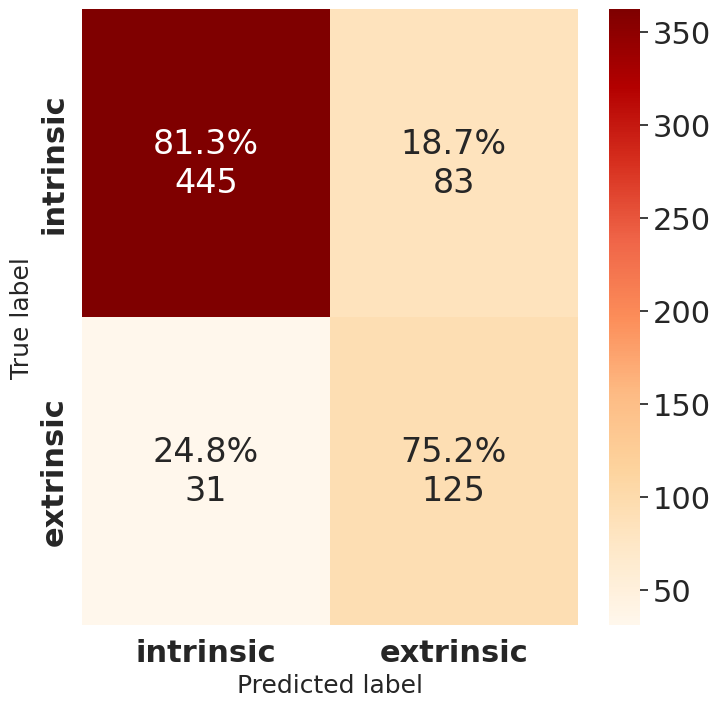

In [ ]:

MNB = MultinomialNB(alpha=0.1,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"multinomial naive bayes")

**LogisticRegression**

Cross Validation score =  [0.86666667 0.83859649 0.81754386 0.83157895 0.83157895 0.83859649
 0.84912281 0.86315789 0.85614035 0.83859649]
Logistic Regression classifier Trainng Score 0.8526315789473684

Logistic Regression classifier Testing Score 0.856140350877193



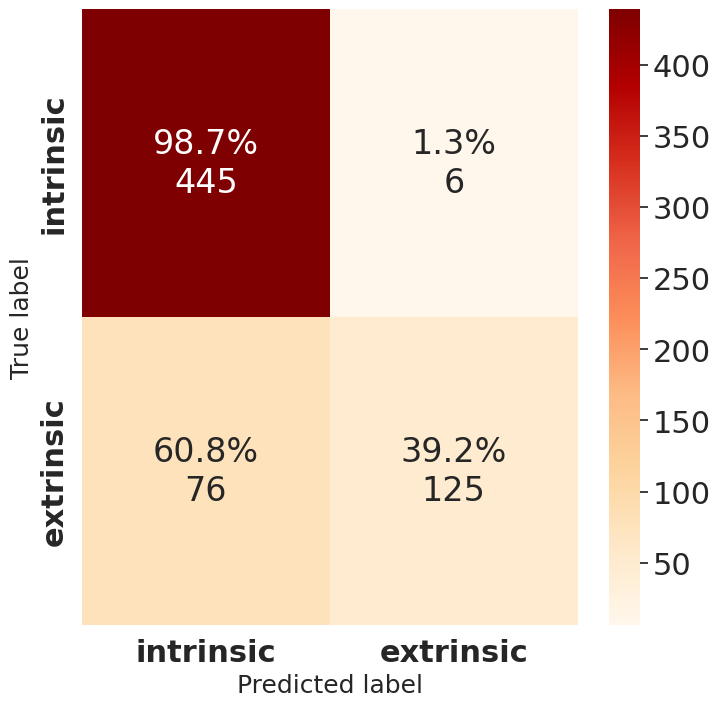

In [ ]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

**RandomForest Classifier**

Cross Validation score =  [0.81403509 0.80350877 0.77192982 0.8        0.78245614 0.78245614
 0.81403509 0.83157895 0.79298246 0.83157895]
Randomforrenst classifier Trainng Score 0.8223684210526315

Randomforrenst classifier Testing Score 0.8210526315789474



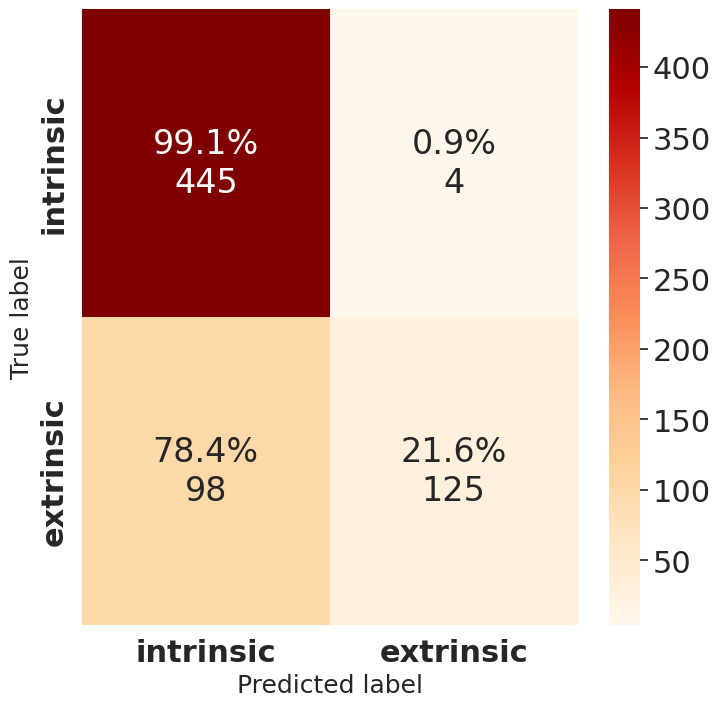

In [ ]:
RF = RandomForestClassifier(max_depth=10)
RF_model = Model(RF,"Randomforrenst classifier")

**SVC**

Cross Validation score =  [0.87719298 0.84912281 0.87017544 0.85614035 0.85964912 0.88070175
 0.87017544 0.88421053 0.88421053 0.87368421]
Support Vector Machine Trainng Score 0.9723684210526315

Support Vector Machine Testing Score 0.8789473684210526



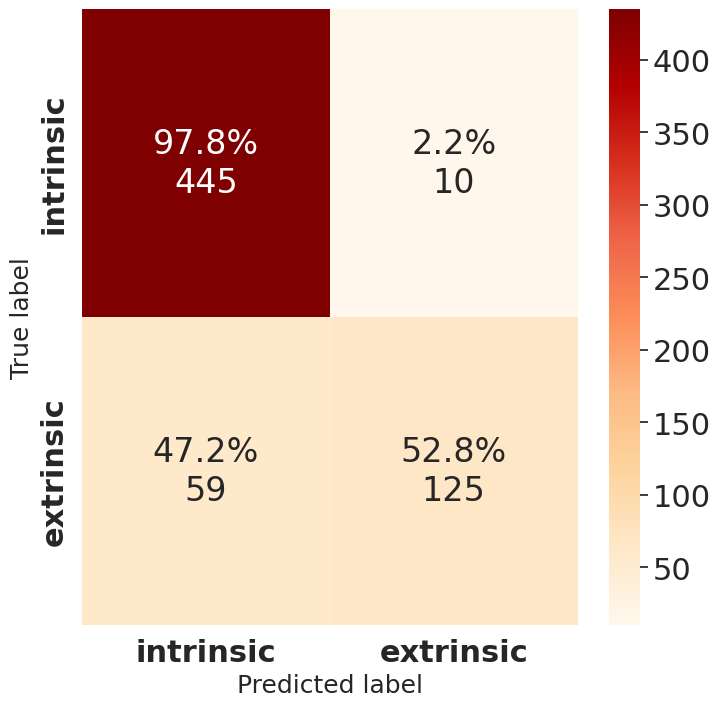

In [ ]:
SVC =LinearSVC(random_state=42)
SVC_model = Model(SVC,"Support Vector Machine")

In [ ]:

MLA = {
     'Multinomial Naive Bayes' : MNB,

     'Logistic Regression' : LR,
     'Random Forrest' : RF,
     'SVM' : SVC,

}

In [ ]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')

    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1

compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
compare

Name  Train Accuracy  Test Accuracy       AUC  \
3                      SVM          0.9724         0.8789  0.752764   
1      Logistic Regression          0.8526         0.8561  0.689258   
2           Random Forrest          0.8224         0.8211  0.603506   
0  Multinomial Naive Bayes          0.9654         0.8000  0.782742   

   Precision    Recall  F1 Score  
3   0.878947  0.878947  0.791617  
1   0.856140  0.856140  0.729514  
2   0.821053  0.821053  0.621248  
0   0.800000  0.800000  0.743239

In [ ]:
#plot comaparison
def compare_plots(y_value,filename):
  plt.subplots(figsize=(11,10))
  sns.barplot(x="Name", y=y_value ,data=compare,palette='hot',hue="Name",edgecolor=sns.color_palette('dark',7),dodge=False)
  plt.xlabel('ML Algorithms',fontsize=20)
  plt.ylabel(y_value,fontsize=20)
  plt.xticks( rotation=0, weight = 'bold', )
  plt.yticks( rotation=0, weight = 'bold')
  plt.tick_params(rotation=0,axis='y', labelsize=20)
  plt.tick_params(rotation=0,axis='x', labelsize=10)
  plt.title('Comparing techniques with '+y_value+'.',fontsize=22)
  plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 20})
  plt.savefig(path + "/"+filename+".png")
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

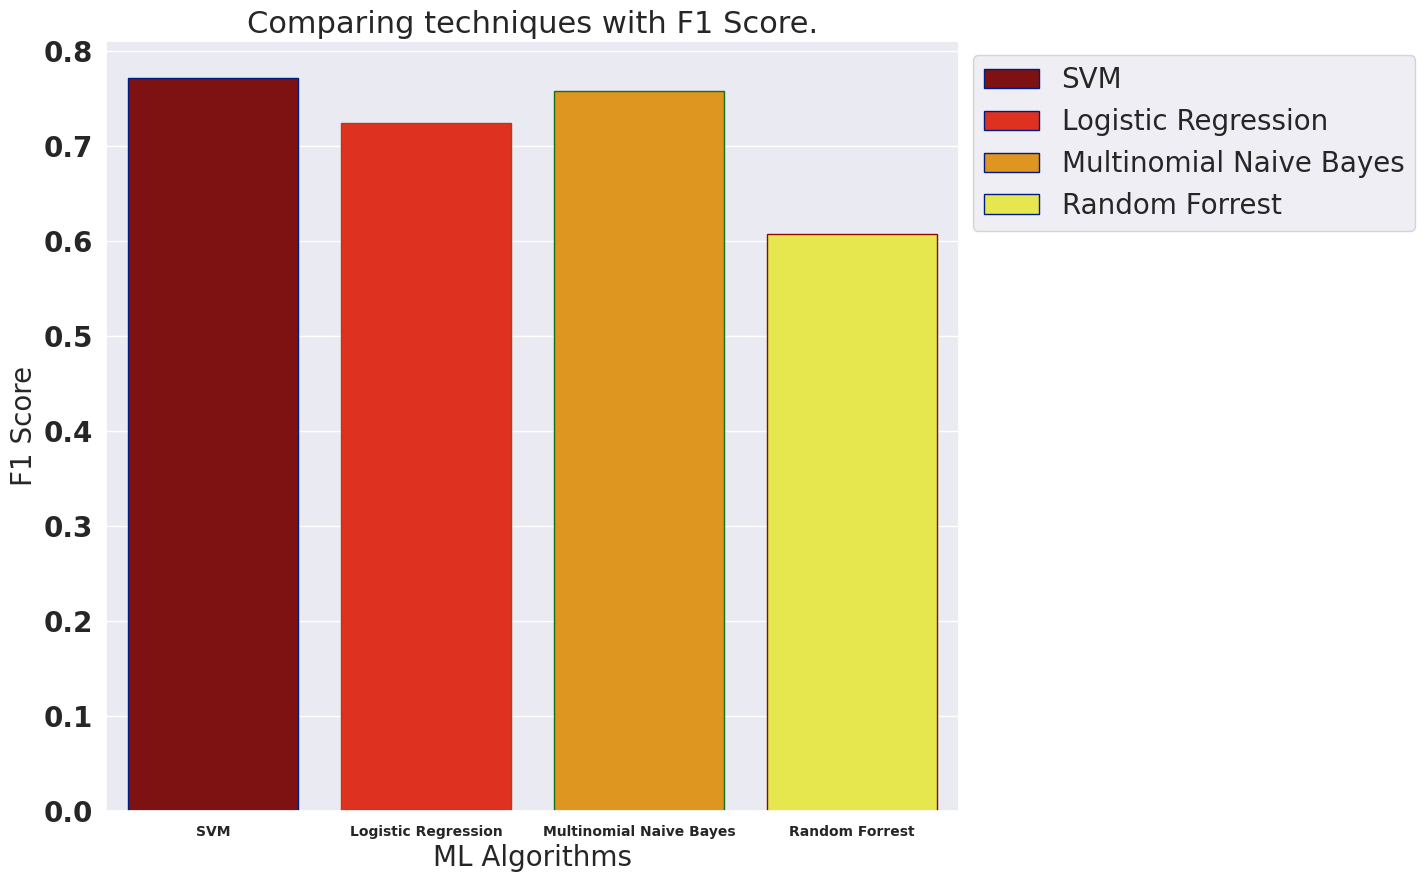

In [ ]:
compare_plots("F1 Score","F1 Score")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

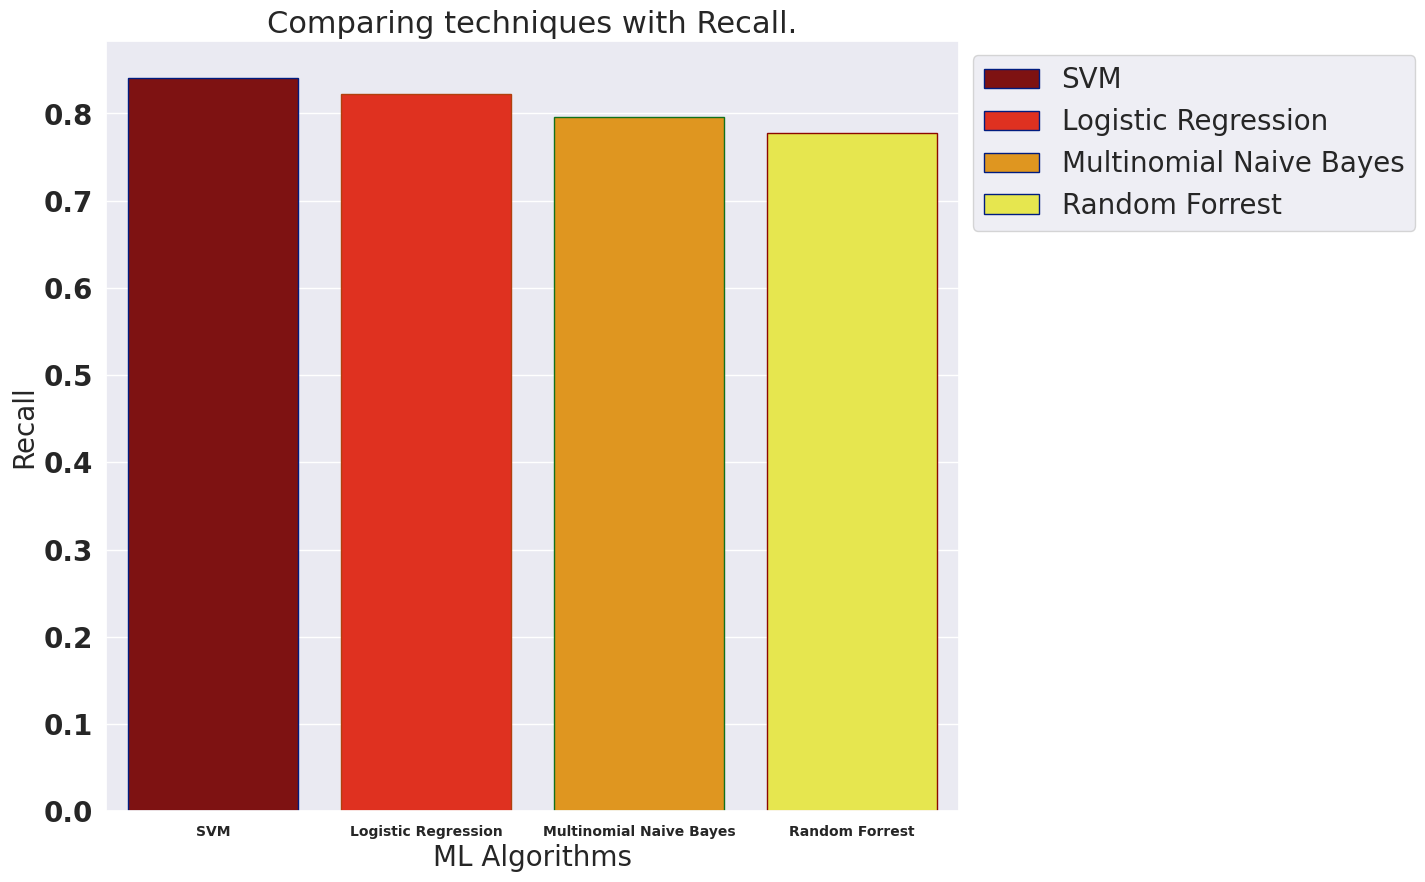

In [ ]:
compare_plots("Recall","Recall")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

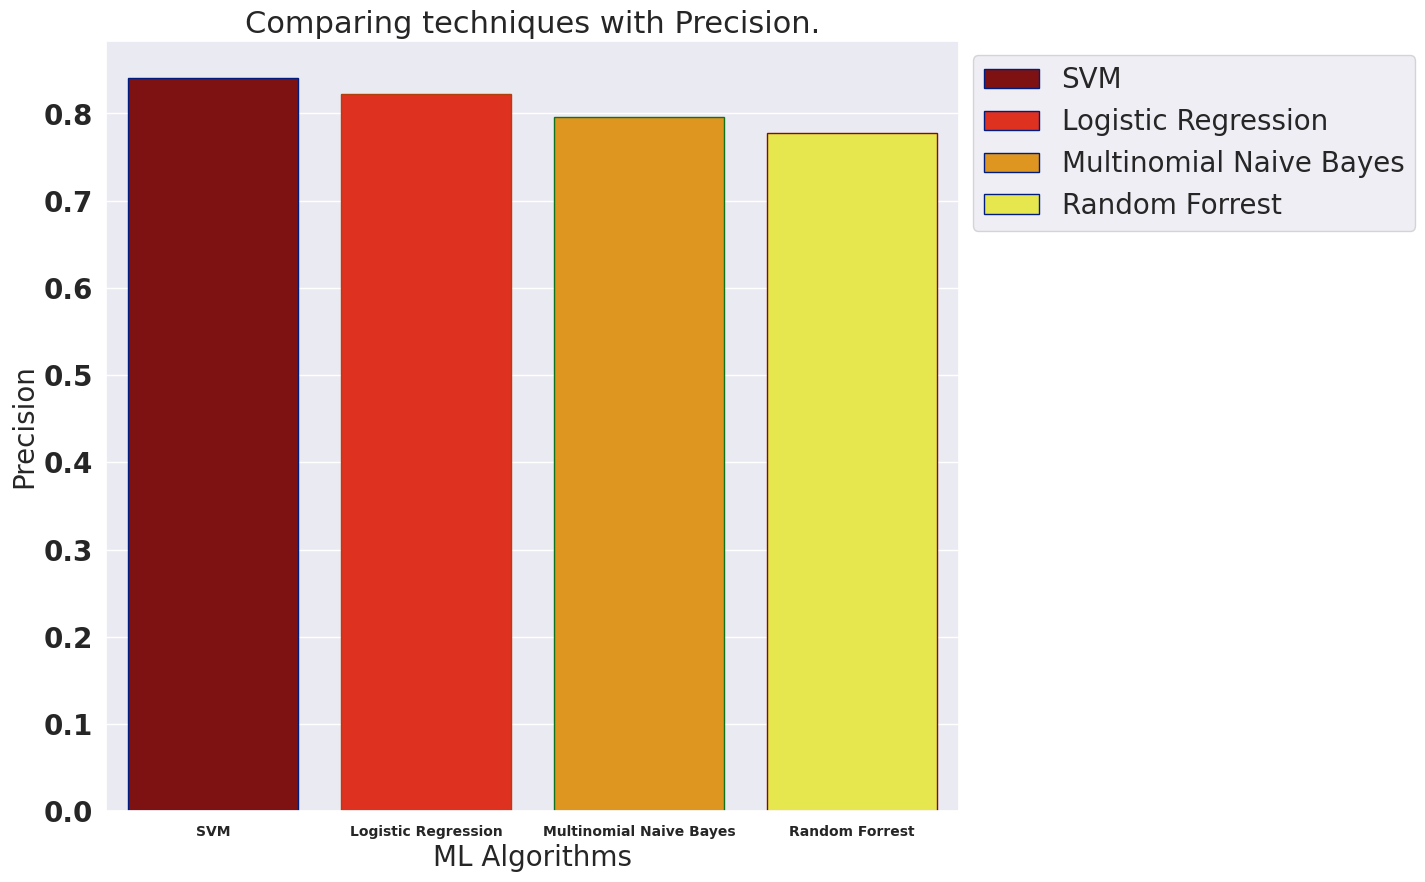

In [ ]:
compare_plots("Precision","Precision")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

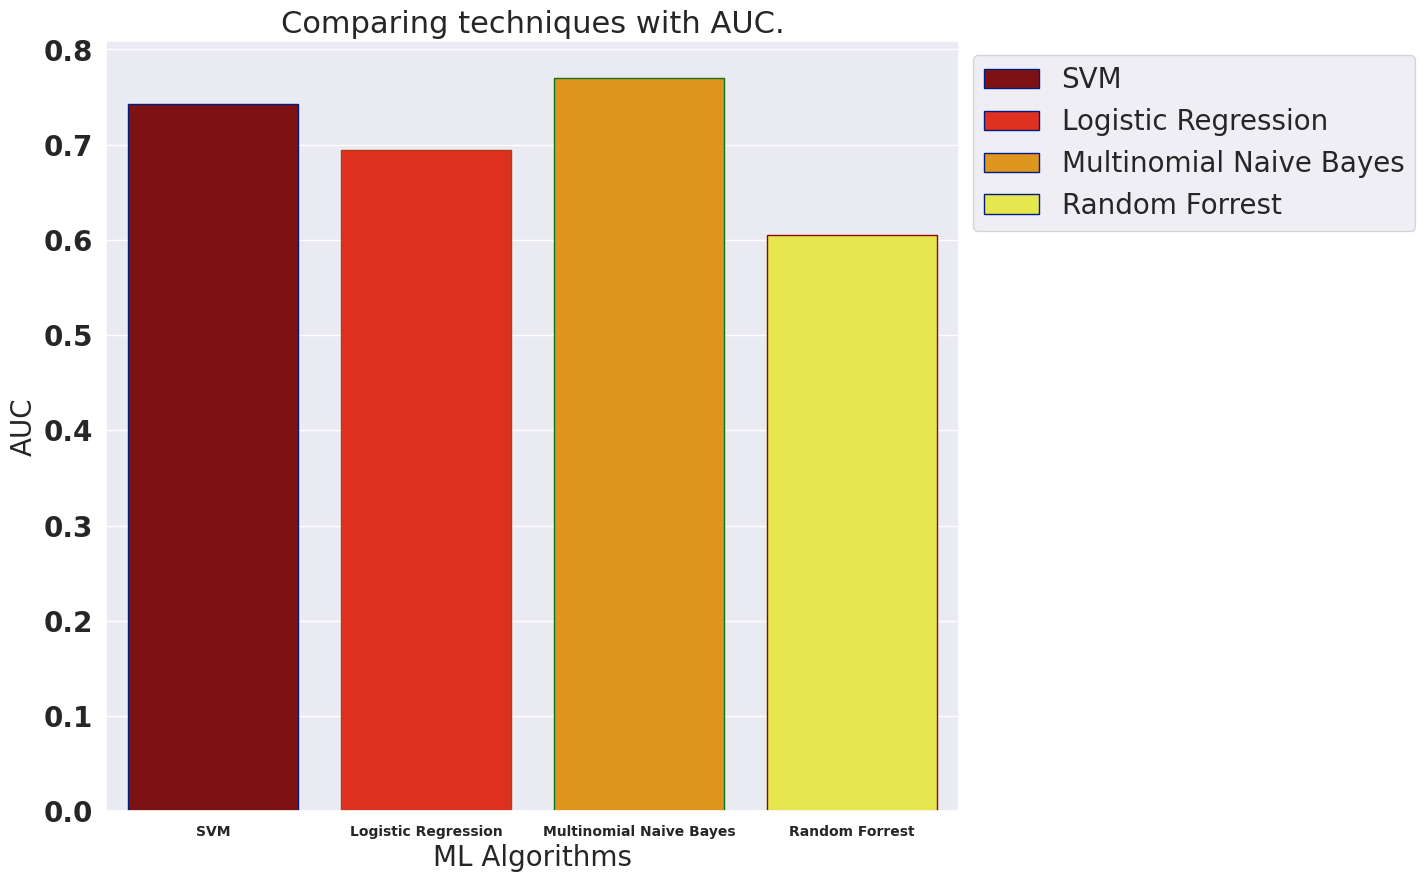

In [ ]:
compare_plots("AUC","Accuracy")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

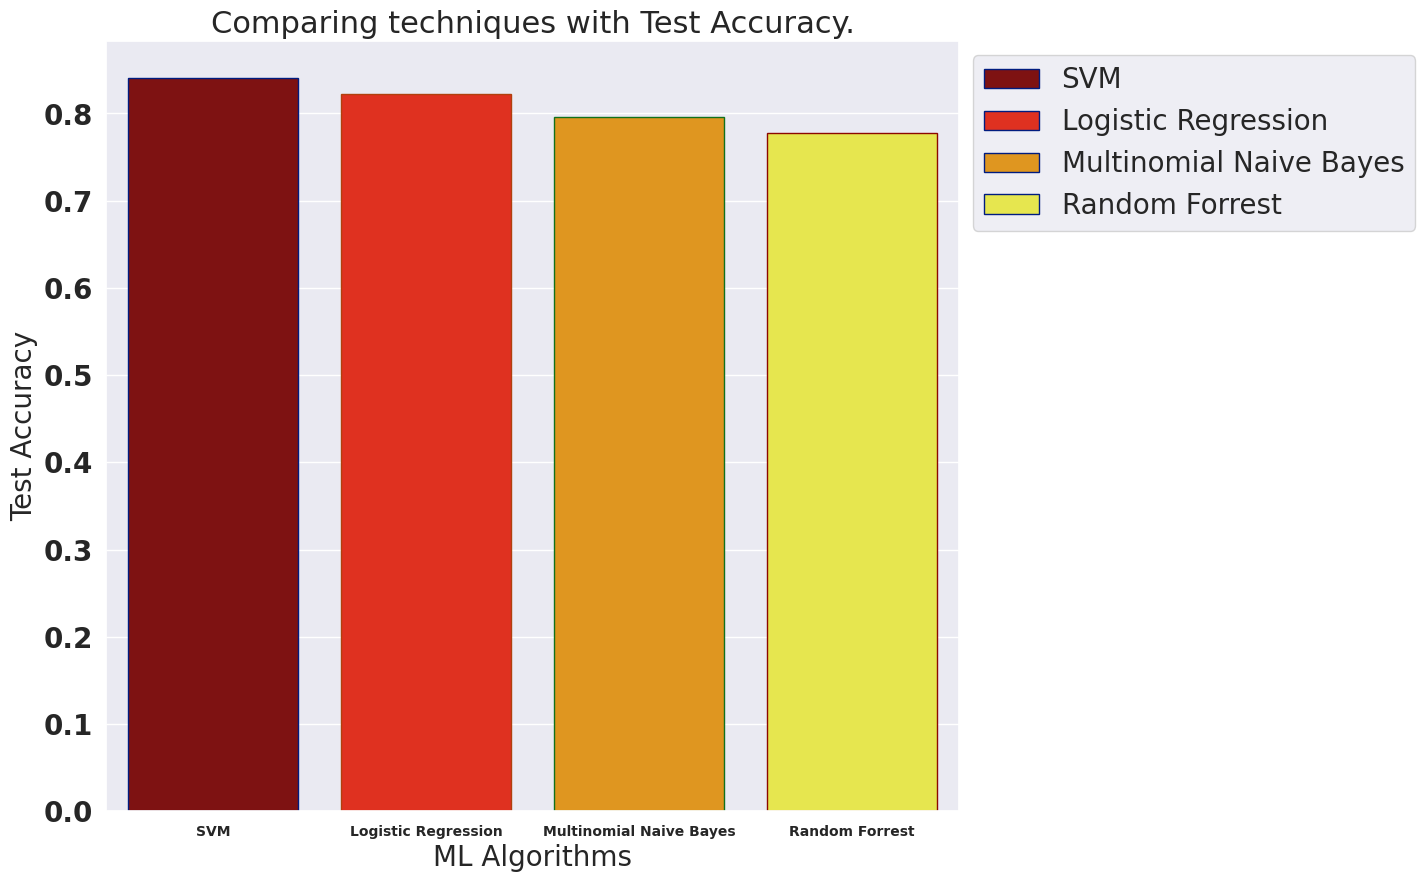

In [ ]:
compare_plots("Test Accuracy","test_acc")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

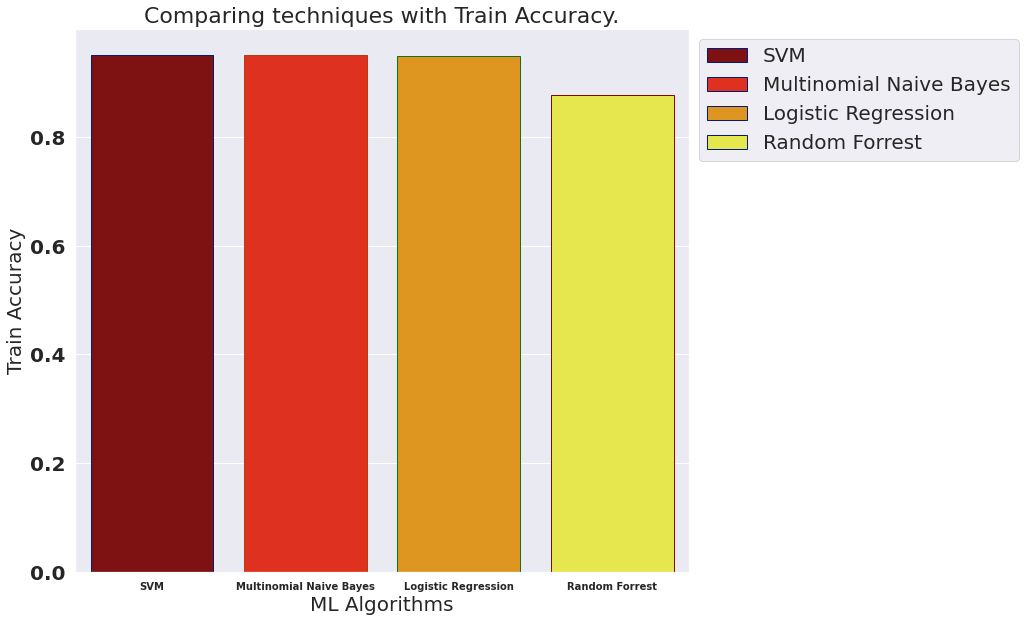

In [ ]:
compare_plots("Train Accuracy","train_acc")

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [ ]:

# create trace2
trace2 = go.Bar(
         x = np.array("Multinomial Naive Bayes"),
         y = np.array(compare[compare["Name"] == 'Multinomial Naive Bayes']['Test Accuracy']),
         name = "Multinomial Naive Bayes",
         marker = dict(color ='rgba(9, 220, 125, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

# create trace4
trace4 = go.Bar(
         x = np.array("Random Forrest"),
         y = np.array(compare[compare["Name"] == 'Random Forrest']['Test Accuracy']),
         name = "Random Forrest",
         marker = dict(color ='rgba(209, 0, 224, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace5
trace5 = go.Bar(
         x = np.array("Logistic Regression"),
         y = np.array(compare[compare["Name"] == 'Logistic Regression']['Test Accuracy']),
         name = "Logistic Regression",
         marker = dict(color ='rgba(0, 224, 209, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace6
trace6 = go.Bar(
         x = np.array("SVM"),
         y = np.array(compare[compare["Name"] == 'SVM']['Test Accuracy']),
         name = "SVM",
         marker = dict(color ='rgba(255, 255, 61, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

data = [trace4,trace6,trace5,trace2]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models test accuracy Comparison")
fig = go.Figure(data = data, layout = layout)
fig.show(renderer="colab")

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

# Logistic regression
modelLR =LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)



# Naive Bayes
modelNB= MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

# SVM with rbf
from sklearn import svm
modelSVMrbf=svm.SVC(probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf)

# Random forest
modelRF= RandomForestClassifier(n_estimators=200,criterion ='entropy')
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)



In [ ]:
from sklearn.calibration import CalibratedClassifierCV
# SVM with linear
modelSVMlinear=SGDClassifier( loss='hinge',penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
modelSVMlinear = modelSVMlinear.fit(X_train,y_train)
calibrator = CalibratedClassifierCV(modelSVMlinear, cv='prefit')
modelSVMlinear = calibrator.fit(X_train, y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)


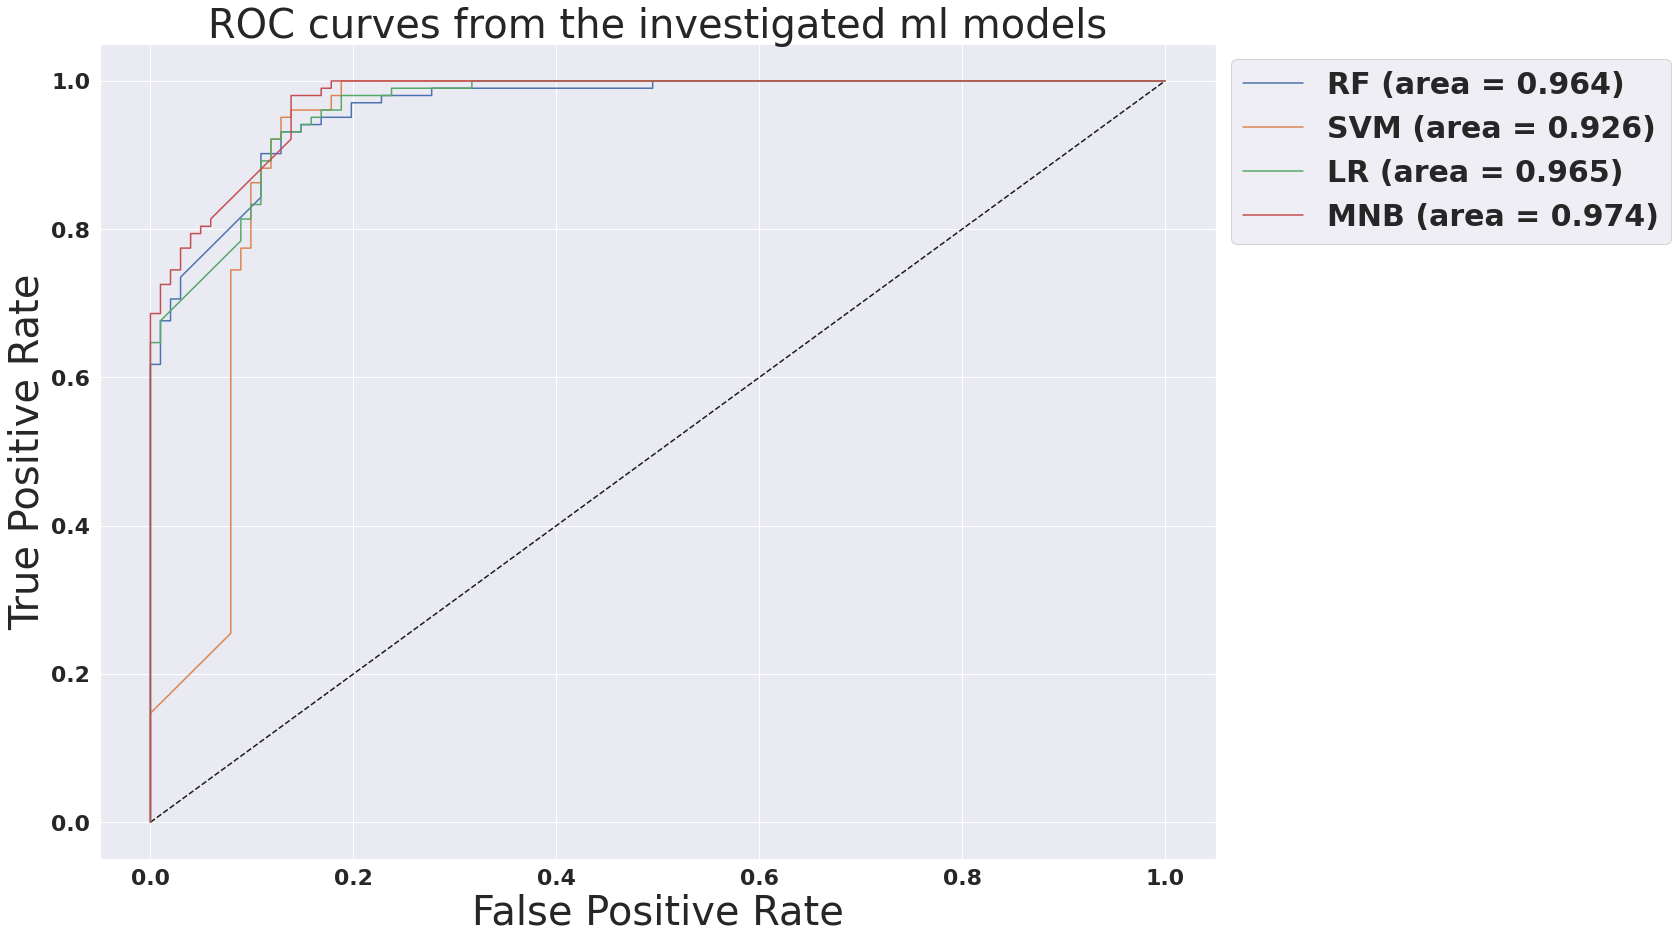

In [ ]:
# Plot ROC curve
font = {'family' : ' Normal',
        'weight' : 'bold',
        'size' : 30}

plt.rc('font', **font)
plt.figure(figsize=(20,15))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM (area = %0.3f)' % roc_auc_SVMrbf)

plt.plot(fpr_lr, tpr_lr, label='LR (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, label='MNB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate',fontsize=40)
plt.ylabel('True Positive Rate',fontsize=40)
plt.title('ROC curves from the investigated ml models',fontsize=40)
plt.legend(loc = 2, bbox_to_anchor = (1,1), prop={'size': 30})
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.savefig(path + "/mlroc.png")
plt.show()